In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
jan24 = pd.read_csv('../data/jan24.csv')
jan24.head(2)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2024,1,1,1,1/1/2024 12:00:00 AM,9E,N131EV,5225,ATL,"Atlanta, GA",...,61.0,48.0,33.0,1.0,164.0,NaN,NaN,NaN,NaN,NaN
1,2024,1,1,1,1/1/2024 12:00:00 AM,9E,N132EV,5115,DTW,"Detroit, MI",...,135.0,106.0,89.0,1.0,651.0,NaN,NaN,NaN,NaN,NaN


In [3]:
months = ["jan24", "feb24", "mar24", "apr24","may24", "jun24", 
          "jul24", "aug24","sep24", "oct24", "nov24", "dec24"]

df24 = pd.concat((pd.read_csv(f"../data/{m}.csv") for m in months),ignore_index=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_23952\788946992.py:4: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df24 = pd.concat((pd.read_csv(f"../data/{m}.csv") for m in months),ignore_index=True)
C:\Users\divya\AppData\Local\Temp\ipykernel_23952\788946992.py:4: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df24 = pd.concat((pd.read_csv(f"../data/{m}.csv") for m in months),ignore_index=True)


In [4]:
df24.shape

(7079081, 42)

In [5]:
df24.isna().sum() 

YEAR                         0
MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
FL_DATE                      0
OP_UNIQUE_CARRIER            0
TAIL_NUM                 20152
OP_CARRIER_FL_NUM            1
ORIGIN                       0
ORIGIN_CITY_NAME             0
ORIGIN_STATE_ABR             0
ORIGIN_STATE_NM              0
DEST                         0
DEST_CITY_NAME               0
DEST_STATE_ABR               0
DEST_STATE_NM                0
CRS_DEP_TIME                 0
DEP_TIME                 92659
DEP_DELAY                92970
DEP_DELAY_NEW            92970
DEP_TIME_BLK                 0
TAXI_OUT                 95734
WHEELS_OFF               95734
WHEELS_ON                97856
TAXI_IN                  97856
CRS_ARR_TIME                 0
ARR_TIME                 97854
ARR_DELAY               113814
ARR_DELAY_NEW           113814
CANCELLED                    0
CANCELLATION_CODE      6982766
DIVERTED                     0
CRS_ELAP

In [6]:
df24['OP_UNIQUE_CARRIER'].value_counts()

OP_UNIQUE_CARRIER
WN    1419419
DL    1009194
AA     984306
UA     760451
OO     744658
YX     301465
MQ     279955
NK     261103
AS     245819
B6     240282
OH     227971
F9     208624
9E     200094
G4     117210
HA      78530
Name: count, dtype: int64

In [7]:
df24['MONTH'].value_counts()

MONTH
7     634613
8     619025
10    615497
6     611132
5     609743
3     591767
12    590581
9     582622
4     582205
11    575404
1     547271
2     519221
Name: count, dtype: int64

In [8]:
df24['FL_DATE'].value_counts()

FL_DATE
12/1/2024 12:00:00 AM     21764
10/11/2024 12:00:00 AM    21548
10/10/2024 12:00:00 AM    21539
10/14/2024 12:00:00 AM    21502
10/17/2024 12:00:00 AM    21496
                          ...  
1/27/2024 12:00:00 AM     15546
1/20/2024 12:00:00 AM     15535
2/3/2024 12:00:00 AM      15501
1/13/2024 12:00:00 AM     15483
11/28/2024 12:00:00 AM    11212
Name: count, Length: 366, dtype: int64

In [9]:
#convert to datetime
df24['FL_DATE'] = pd.to_datetime(df24['FL_DATE'],format='mixed')

In [10]:
df24['FL_DATE'].dtype

dtype('<M8[ns]')

In [11]:
df24['FL_DATE'] = df24['FL_DATE'].dt.date

In [12]:
df24["OP_UNIQUE_CARRIER"] = df24["OP_UNIQUE_CARRIER"].map({
    "WN": "Southwest Airlines",
    "DL": "Delta Air Lines",
    "AA": "American Airlines",
    "UA": "United Airlines",
    "OO": "SkyWest Airlines",
    "YX": "Republic Airways",
    "MQ": "Envoy Air",
    "NK": "Spirit Airlines",
    "AS": "Alaska Airlines",
    "B6": "JetBlue Airways",
    "OH": "PSA Airlines",
    "F9": "Frontier Airlines",
    "9E": "Endeavor Air",
    "G4": "Allegiant Air",
    "HA": "Hawaiian Airlines"
})

In [13]:
df24.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2024,1,1,1,2024-01-01,Endeavor Air,N131EV,5225.0,ATL,"Atlanta, GA",...,61.0,48.0,33.0,1.0,164.0,NaN,NaN,NaN,NaN,NaN
1,2024,1,1,1,2024-01-01,Endeavor Air,N132EV,5115.0,DTW,"Detroit, MI",...,135.0,106.0,89.0,1.0,651.0,NaN,NaN,NaN,NaN,NaN
2,2024,1,1,1,2024-01-01,Endeavor Air,N132EV,5414.0,DSM,"Des Moines, IA",...,111.0,108.0,87.0,1.0,533.0,NaN,NaN,NaN,NaN,NaN
3,2024,1,1,1,2024-01-01,Endeavor Air,N133EV,5284.0,LGA,"New York, NY",...,150.0,129.0,103.0,1.0,722.0,NaN,NaN,NaN,NaN,NaN
4,2024,1,1,1,2024-01-01,Endeavor Air,N133EV,5341.0,CHS,"Charleston, SC",...,118.0,104.0,83.0,1.0,641.0,NaN,NaN,NaN,NaN,NaN


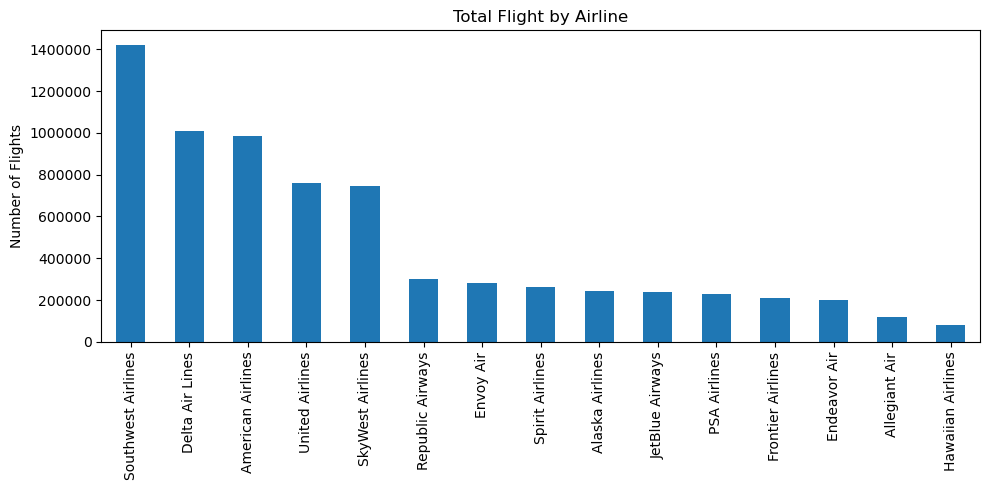

In [115]:
# airlines with the most flights
flight_freq_airline = (df24.groupby('OP_UNIQUE_CARRIER')['FLIGHTS'].count().sort_values(ascending=False))

plt.figure(figsize=(10,5))
flight_freq_airline.plot(kind='bar')
plt.title('Total Flight by Airline')
plt.ylabel('Number of Flights')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

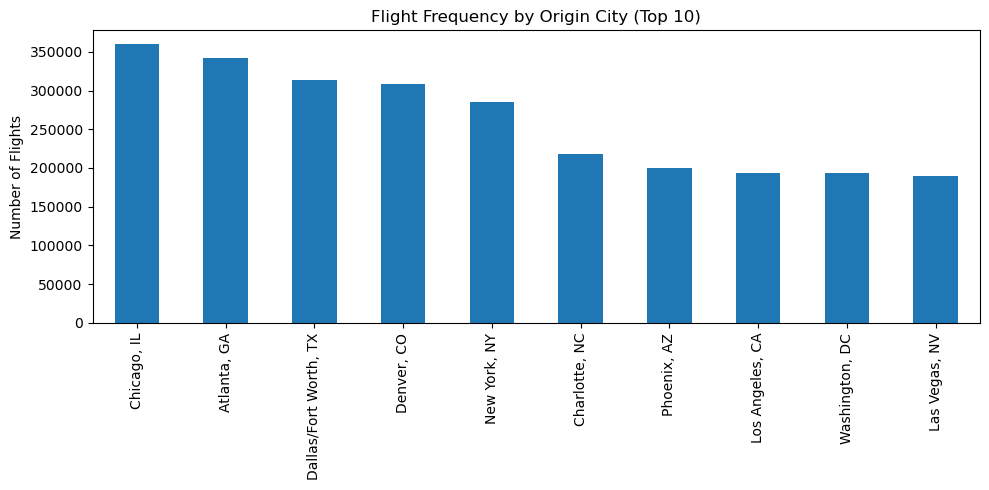

In [64]:
# cities with the most departing flights
flight_freq_city = (df24.groupby('ORIGIN_CITY_NAME')['FLIGHTS'].count().sort_values(ascending=False).head(10))

plt.figure(figsize=(10,5))
flight_freq_city.plot(kind='bar')
plt.title('Flight Frequency by Origin City (Top 10)')
plt.xlabel('')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [16]:
df24['CANCELLED'].value_counts()

CANCELLED
0.0    6982766
1.0      96315
Name: count, dtype: int64

In [17]:
df24['OP_CARRIER_FL_NUM'] = df24['OP_CARRIER_FL_NUM'].astype('Int64')

In [18]:
df24['CANCELLED'] = df24['CANCELLED'].astype(int)
df24['DIVERTED'] = df24['DIVERTED'].astype(int)

In [19]:
df24['FLIGHT_STATUS'] = 'OPERATED'
df24.loc[df24['CANCELLED'] == 1, 'FLIGHT_STATUS'] = 'CANCELLED'
df24.loc[df24['DIVERTED'] == 1, 'FLIGHT_STATUS'] = 'DIVERTED'

In [20]:
df_delay = df24[df24['FLIGHT_STATUS'] == 'OPERATED']
#df_delay

In [21]:
df_cancel = df24[df24['FLIGHT_STATUS'] == 'CANCELLED']
#df_cancel

In [22]:
df_divert = df24[df24['FLIGHT_STATUS'] == 'DIVERTED']
#df_divert

In [93]:

df24['FLIGHT_OUTCOME'] = 'On-Time'

df24.loc[df24['FLIGHT_STATUS'] == 'CANCELLED', 'FLIGHT_OUTCOME'] = 'Cancelled'
df24.loc[df24['FLIGHT_STATUS'] == 'DIVERTED', 'FLIGHT_OUTCOME'] = 'Diverted'
df24.loc[
    (df24['FLIGHT_STATUS'] == 'OPERATED') & (df24['ARR_DELAY'] > 15),
    'FLIGHT_OUTCOME'
] = 'Delayed'


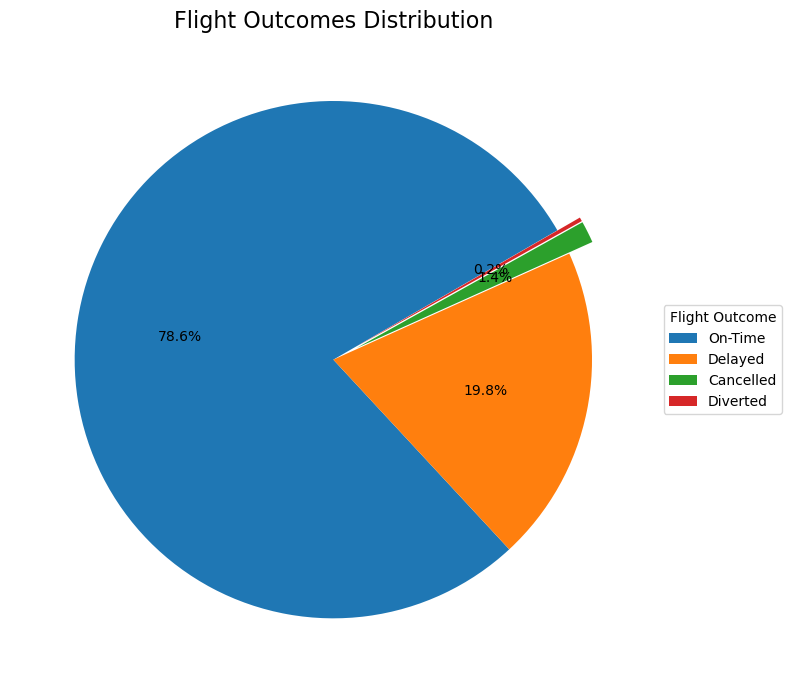

In [113]:
flight_outcome_counts = df24['FLIGHT_OUTCOME'].value_counts()

explode = [0.1 if x < flight_outcome_counts.sum()*0.05 else 0 
           for x in flight_outcome_counts]

plt.figure(figsize=(8,8))
plt.pie(flight_outcome_counts,autopct='%1.1f%%',startangle=30,explode=explode)
plt.legend( flight_outcome_counts.index, title='Flight Outcome',loc='center left',bbox_to_anchor=(1, 0.5))

plt.title('Flight Outcomes', fontsize=16)
plt.tight_layout()
plt.show()


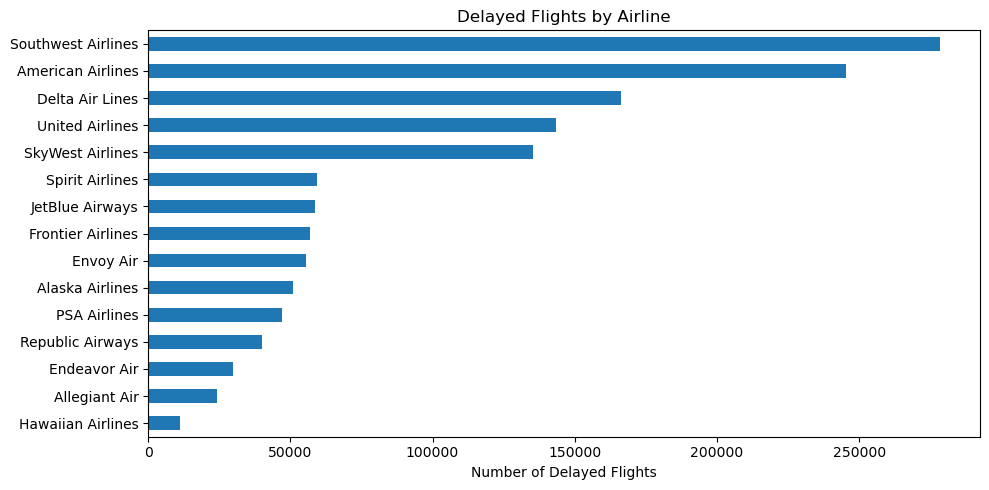

In [114]:
# Delayed flights by airline
delayed_flights = df_delay[df_delay['ARR_DELAY'] > 15]

delay_by_airline = (delayed_flights.groupby('OP_UNIQUE_CARRIER')['ARR_DELAY'].count().sort_values(ascending=True))

plt.figure(figsize=(10,5))
delay_by_airline.plot(kind='barh')
plt.title('Delayed Flights by Airline')
plt.ylabel('')
plt.xlabel('Number of Delayed Flights')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Flights are categorized. Cancelled flights, Divereted flights  are excluded from delays

In [75]:
delay_columns = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']
df_delay[delay_columns] = df_delay[delay_columns].fillna(0)
df_delay.head(2)

C:\Users\divya\AppData\Local\Temp\ipykernel_23952\2152398193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay[delay_columns] = df_delay[delay_columns].fillna(0)


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FLIGHT_STATUS
0,2024,1,1,1,2024-01-01,Endeavor Air,N131EV,5225,ATL,"Atlanta, GA",...,48.0,33.0,1.0,164.0,0.0,0.0,0.0,0.0,0.0,OPERATED
1,2024,1,1,1,2024-01-01,Endeavor Air,N132EV,5115,DTW,"Detroit, MI",...,106.0,89.0,1.0,651.0,0.0,0.0,0.0,0.0,0.0,OPERATED


In [76]:
# Seasonal Buckets
def get_season(m):
    if m in [12,1,2]:
        return 'Winter'
    elif m in [3,4,5]:
        return 'Spring'
    elif m in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'
df24['SEASON'] = df24['MONTH'].apply(get_season)

In [77]:
df_op = df24[df24['FLIGHT_STATUS'] == 'OPERATED']
df_op.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FLIGHT_STATUS,SEASON
0,2024,1,1,1,2024-01-01,Endeavor Air,N131EV,5225,ATL,"Atlanta, GA",...,33.0,1.0,164.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
1,2024,1,1,1,2024-01-01,Endeavor Air,N132EV,5115,DTW,"Detroit, MI",...,89.0,1.0,651.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
2,2024,1,1,1,2024-01-01,Endeavor Air,N132EV,5414,DSM,"Des Moines, IA",...,87.0,1.0,533.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
3,2024,1,1,1,2024-01-01,Endeavor Air,N133EV,5284,LGA,"New York, NY",...,103.0,1.0,722.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
4,2024,1,1,1,2024-01-01,Endeavor Air,N133EV,5341,CHS,"Charleston, SC",...,83.0,1.0,641.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter


### “How often are flights delayed?”

In [27]:
df_op['delayed'] = df_op['ARR_DELAY'] > 15
df_op

C:\Users\divya\AppData\Local\Temp\ipykernel_23952\3968377089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op['delayed'] = df_op['ARR_DELAY'] > 15


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FLIGHT_STATUS,SEASON,delayed
0,2024,1,1,1,2024-01-01,Endeavor Air,N131EV,5225,ATL,"Atlanta, GA",...,1.0,164.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter,False
1,2024,1,1,1,2024-01-01,Endeavor Air,N132EV,5115,DTW,"Detroit, MI",...,1.0,651.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter,False
2,2024,1,1,1,2024-01-01,Endeavor Air,N132EV,5414,DSM,"Des Moines, IA",...,1.0,533.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter,False
3,2024,1,1,1,2024-01-01,Endeavor Air,N133EV,5284,LGA,"New York, NY",...,1.0,722.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter,False
4,2024,1,1,1,2024-01-01,Endeavor Air,N133EV,5341,CHS,"Charleston, SC",...,1.0,641.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7079076,2024,12,31,2,2024-12-31,Republic Airways,N880RW,5825,BUF,"Buffalo, NY",...,1.0,292.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter,False
7079077,2024,12,31,2,2024-12-31,Republic Airways,N882RW,5754,GRR,"Grand Rapids, MI",...,1.0,618.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter,False
7079078,2024,12,31,2,2024-12-31,Republic Airways,N882RW,5754,LGA,"New York, NY",...,1.0,618.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter,False
7079079,2024,12,31,2,2024-12-31,Republic Airways,N882RW,5848,LGA,"New York, NY",...,1.0,269.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter,False


In [28]:
#Monthly avg delay rate
monthly_delay_rate = (df_op.groupby(['YEAR','MONTH'])['delayed'].mean().reset_index(name='delayed_rate'))

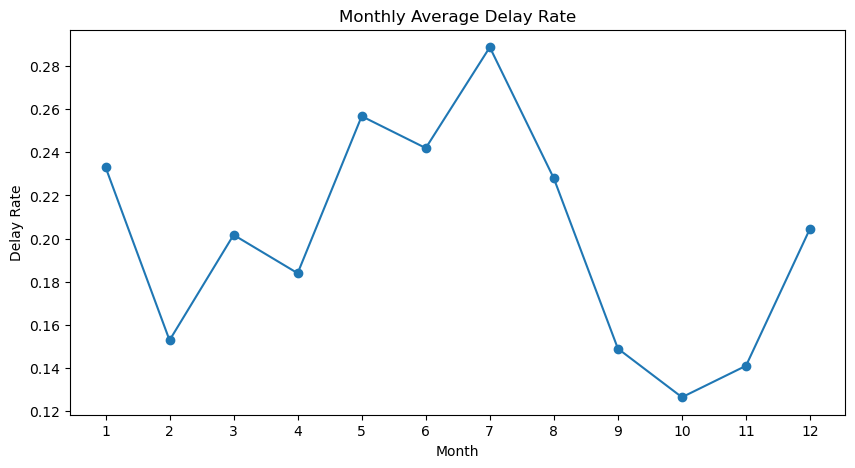

In [29]:
plt.figure(figsize=(10,5))
plt.plot(monthly_delay_rate['MONTH'],monthly_delay_rate['delayed_rate'],marker='o')
plt.xlabel('Month')
plt.ylabel('Delay Rate')
plt.title('Monthly Average Delay Rate')
plt.xticks(range(1, 13))
plt.show()

In [30]:
# Monthly total operated flights vs delayed flights

monthly_total = (df_op.groupby('MONTH')['FLIGHTS'].count().reset_index(name='total_flights'))

In [31]:
monthly_delayed = (df_op[df_op['delayed'] == 1].groupby('MONTH')['FLIGHTS'].count().reset_index(name='delayed_flights'))

In [116]:
monthly_tot_delay = pd.merge(monthly_total,monthly_delayed,on='MONTH',how='left').fillna(0)

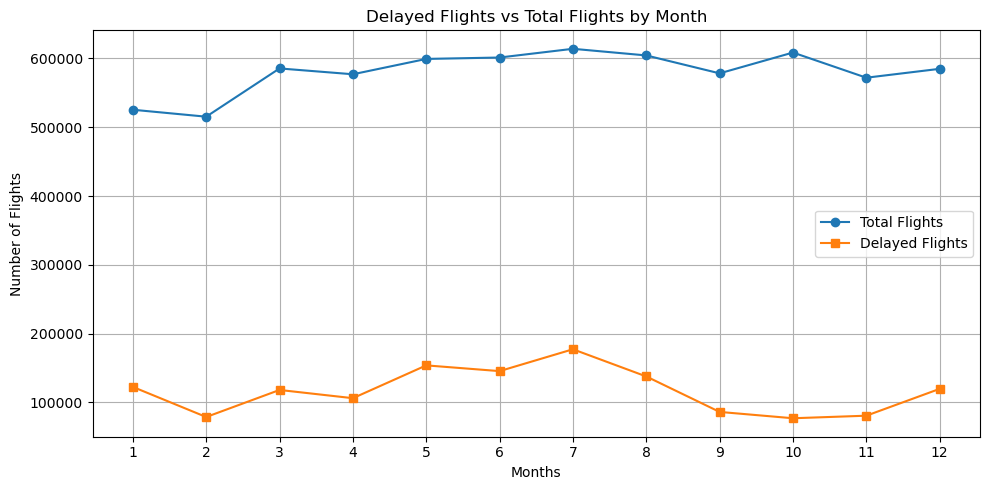

In [117]:
plt.figure(figsize=(10,5))
plt.plot(monthly_tot_delay['MONTH'],monthly_tot_delay['total_flights'],marker='o',label='Total Flights')
plt.plot(monthly_tot_delay['MONTH'],monthly_tot_delay['delayed_flights'],marker='s',label='Delayed Flights')
plt.title('Delayed Flights vs Total Flights by Month')
plt.xlabel('Months')
plt.ylabel('Number of Flights')
plt.xticks(range(1,13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

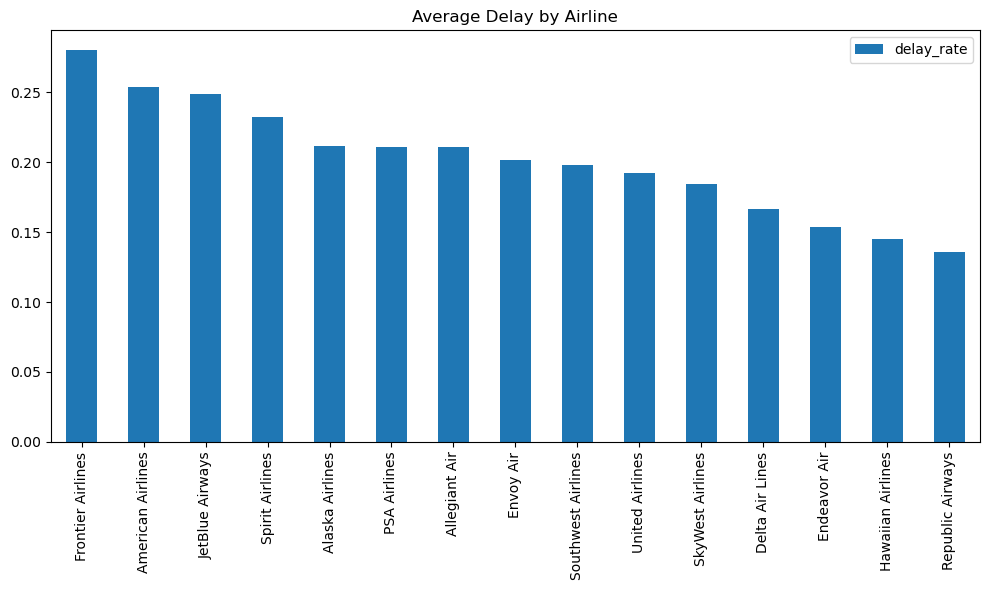

In [34]:
#delay avg rate by airline
airline_delay_rate = (df_op.groupby('OP_UNIQUE_CARRIER')['delayed'].mean().reset_index(name='delay_rate').sort_values(by='delay_rate',ascending=False))
,
airline_delay_rate.set_index('OP_UNIQUE_CARRIER').plot(kind='bar',stacked=True,figsize=(10, 6))
plt.title('Average Delay by Airline')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [119]:
#average delay minutes by airline
airline_avg_delay = (df_op.groupby('OP_UNIQUE_CARRIER')['ARR_DELAY'].mean().reset_index(name='avg_arr_delay').sort_values(by='avg_arr_delay',ascending=False))
airline_avg_delay

,OP_UNIQUE_CARRIER,avg_arr_delay
2,American Airlines,15.307916
6,Frontier Airlines,15.247771
8,JetBlue Airways,10.739642
9,PSA Airlines,10.026785
1,Allegiant Air,9.710381
13,Spirit Airlines,8.415318
11,SkyWest Airlines,7.355390
5,Envoy Air,6.457716
14,United Airlines,5.742944
12,Southwest Airlines,5.125102


In [121]:
#cancellation
cancel_rate = (df24.groupby('OP_UNIQUE_CARRIER')['FLIGHT_STATUS']
         .apply(lambda x: (x == 'CANCELLED').mean()).reset_index(name='cancellation_rate').sort_values(by='cancellation_rate',ascending=False))
cancel_rate

,OP_UNIQUE_CARRIER,cancellation_rate
6,Frontier Airlines,0.023176
4,Endeavor Air,0.023029
0,Alaska Airlines,0.019571
13,Spirit Airlines,0.019142
10,Republic Airways,0.018496
1,Allegiant Air,0.017217
9,PSA Airlines,0.016454
14,United Airlines,0.016409
8,JetBlue Airways,0.015544
2,American Airlines,0.015495


In [37]:
delay_columns = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']

df_op[delay_columns] = df_op[delay_columns].fillna(0)

#
delay_causes = (df_op.groupby('OP_UNIQUE_CARRIER')[delay_columns].mean().reset_index())
delay_causes

C:\Users\divya\AppData\Local\Temp\ipykernel_23952\1247477638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op[delay_columns] = df_op[delay_columns].fillna(0)


,OP_UNIQUE_CARRIER,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,Alaska Airlines,3.224344,0.436741,2.982461,0.055725,4.453394
1,Allegiant Air,6.715848,2.016339,3.457408,0.043453,6.996692
2,American Airlines,7.371353,1.215471,2.915393,0.042114,10.857029
3,Delta Air Lines,5.896933,0.565469,2.316783,0.009549,3.633364
4,Endeavor Air,3.901641,0.851952,2.849932,0.005357,5.043963
5,Envoy Air,3.089264,1.488898,2.794956,0.021117,6.085541
6,Frontier Airlines,6.000604,0.454197,3.975069,0.000000,12.388752
7,Hawaiian Airlines,4.188374,0.194247,0.221414,0.032718,2.501964
8,JetBlue Airways,7.900222,0.495755,4.000883,0.029739,7.649194
9,PSA Airlines,5.204410,1.511819,2.418777,0.033272,9.020946


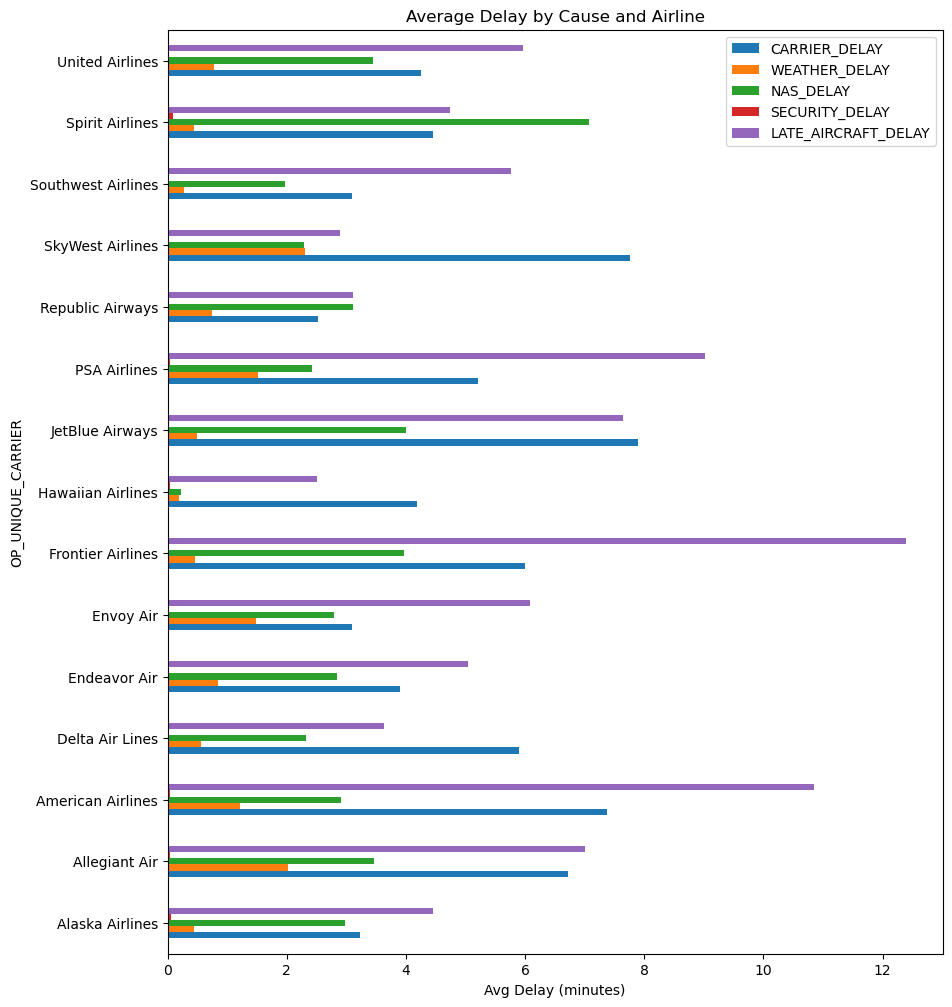

In [39]:
delay_causes.set_index('OP_UNIQUE_CARRIER').plot(kind='barh',stacked=False,figsize=(10,12))
plt.title('Average Delay by Cause and Airline')
plt.xlabel('Avg Delay (minutes)')
plt.xticks(rotation=0)
plt.show()

In [40]:
#Airline Reliability & Consistency
#Metrics: delay rate, avg delay, variability, extreme delays, cancellations

airline_reliability = (df_op.groupby('OP_UNIQUE_CARRIER').agg(delay_rate=('delayed', 'mean'),avg_arr_delay=('ARR_DELAY', 'mean'),
                        delay_std=('ARR_DELAY', 'std'),extreme_delay_rate=('ARR_DELAY', lambda x: (x > 60).mean())).reset_index())
cancel_rate = (df24.groupby('OP_UNIQUE_CARRIER')['FLIGHT_STATUS'].apply(lambda x: (x == 'CANCELLED').mean()).reset_index(name='cancellation_rate'))
airline_summary = airline_reliability.merge(cancel_rate, on='OP_UNIQUE_CARRIER')
airline_summary.sort_values('delay_rate', ascending=False)

,OP_UNIQUE_CARRIER,delay_rate,avg_arr_delay,delay_std,extreme_delay_rate,cancellation_rate
6,Frontier Airlines,0.280359,15.247771,73.623023,0.112850,0.023176
2,American Airlines,0.254112,15.307916,83.903851,0.102152,0.015495
8,JetBlue Airways,0.248796,10.739642,65.104532,0.105345,0.015544
13,Spirit Airlines,0.232415,8.415318,52.471972,0.089945,0.019142
0,Alaska Airlines,0.211740,4.467858,36.050577,0.051680,0.019571
9,PSA Airlines,0.210937,10.026785,72.885538,0.085102,0.016454
1,Allegiant Air,0.210703,9.710381,79.485541,0.085000,0.017217
5,Envoy Air,0.201546,6.457716,48.928181,0.068121,0.014234
12,Southwest Airlines,0.198294,5.125102,35.282589,0.055717,0.008294
14,United Airlines,0.192354,5.742944,52.810622,0.074096,0.016409


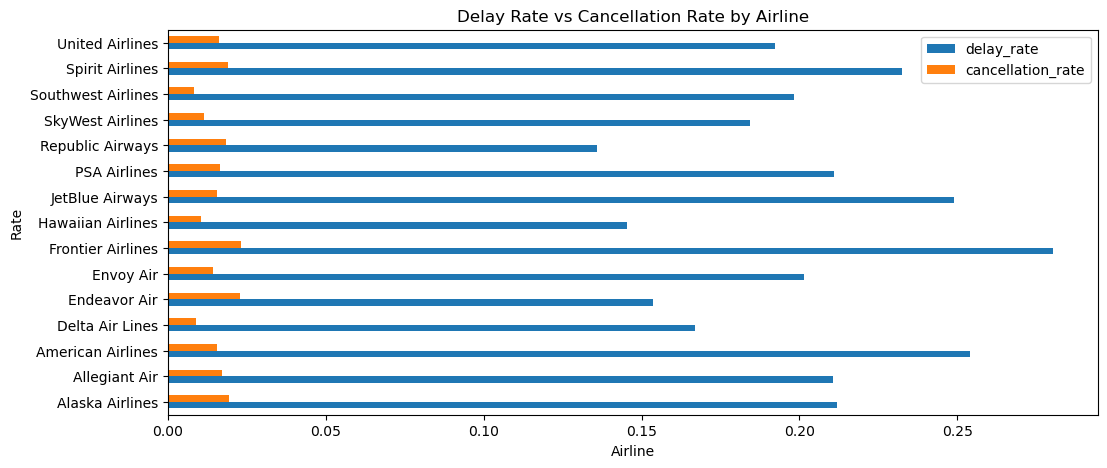

In [41]:
airline_summary.plot(x='OP_UNIQUE_CARRIER',y=['delay_rate','cancellation_rate'],kind='barh',figsize=(12,5))
plt.title('Delay Rate vs Cancellation Rate by Airline')
plt.ylabel('Rate')
plt.xlabel('Airline')
plt.xticks(rotation=0)
plt.show()

In [42]:
# Delay Escalation by Time of Day
# Delay rate & severity by departure block
time_block_delay = (
    df_op.groupby('DEP_TIME_BLK').agg(delay_rate=('delayed','mean'),avg_delay=('ARR_DELAY','mean')).reset_index())
time_block_delay

,DEP_TIME_BLK,delay_rate,avg_delay
0,0001-0559,0.096456,-1.513341
1,0600-0659,0.091660,-2.182644
2,0700-0759,0.117488,-0.422201
3,0800-0859,0.132966,0.092176
4,0900-0959,0.146987,1.555004
5,1000-1059,0.158923,2.503933
6,1100-1159,0.171240,3.933649
7,1200-1259,0.185113,5.588601
8,1300-1359,0.205987,7.533961
9,1400-1459,0.226025,9.639201


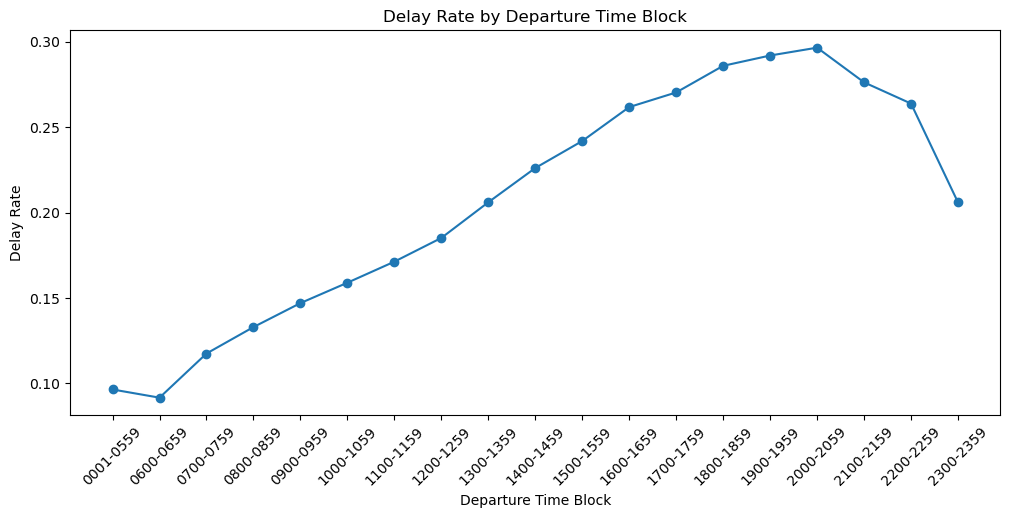

In [43]:
plt.figure(figsize=(12,5))
plt.plot(time_block_delay['DEP_TIME_BLK'], time_block_delay['delay_rate'], marker='o')
plt.xticks(rotation=45)
plt.title('Delay Rate by Departure Time Block')
plt.xlabel('Departure Time Block')
plt.ylabel('Delay Rate')
plt.show()

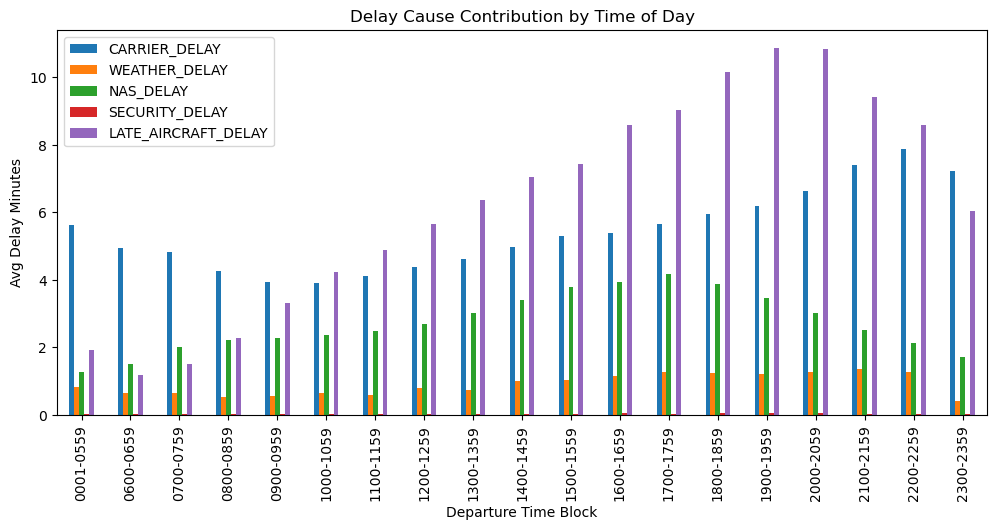

In [44]:
delay_causes_time = (df_op.groupby('DEP_TIME_BLK')[delay_columns].mean().reset_index())
delay_causes_time.set_index('DEP_TIME_BLK').plot(kind='bar', stacked=False, figsize=(12,5))
plt.title('Delay Cause Contribution by Time of Day')
plt.ylabel('Avg Delay Minutes')
plt.xlabel('Departure Time Block')
plt.show()

In [45]:
# Seasonal Risk Profiles
# Seasonal delay & cancellation metrics
seasonal_summary = (
    df24.groupby('SEASON').agg(
        delay_rate=('ARR_DELAY', lambda x: (x > 15).mean()),
        avg_delay=('ARR_DELAY','mean'),
        cancellation_rate=('FLIGHT_STATUS', lambda x: (x == 'CANCELLED').mean()) ).reset_index()
)
seasonal_summary

,SEASON,delay_rate,avg_delay,cancellation_rate
0,Fall,0.137499,-0.221652,0.006998
1,Spring,0.211960,8.696473,0.009754
2,Summer,0.246927,13.522859,0.020894
3,Winter,0.193710,6.094540,0.016621


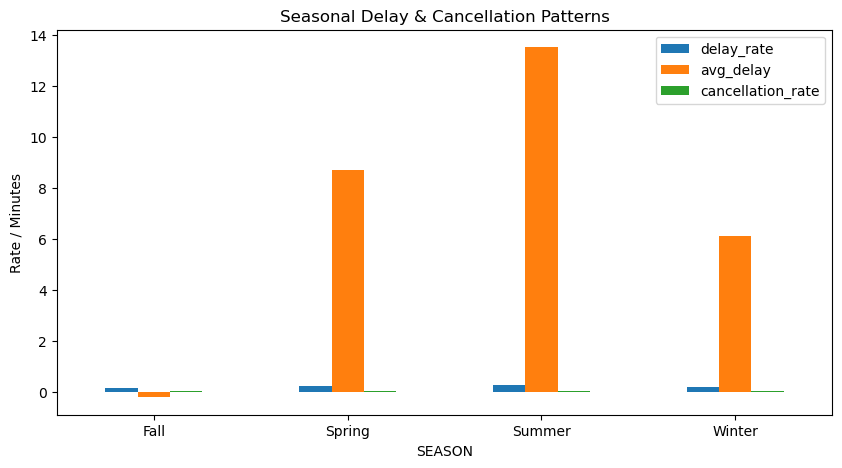

In [46]:
seasonal_summary.set_index('SEASON').plot(kind='bar', figsize=(10,5))
plt.title('Seasonal Delay & Cancellation Patterns')
plt.ylabel('Rate / Minutes')
plt.xticks(rotation=0)
plt.show()

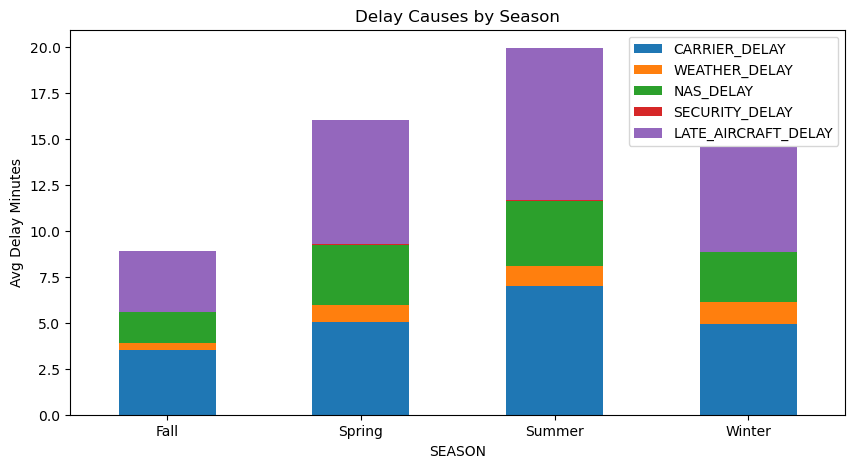

In [47]:
# Delay cause composition by season
seasonal_causes = (df_op.groupby('SEASON')[delay_columns].mean())

seasonal_causes.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Delay Causes by Season')
plt.ylabel('Avg Delay Minutes')
plt.xticks(rotation=0)
plt.show()

In [48]:
# Geographic & Route-Level Risk
# Airport-level delay & cancellation
airport_risk = (
    df24.groupby('ORIGIN')
    .agg(
        delay_rate=('ARR_DELAY', lambda x: (x > 15).mean()),
        cancellation_rate=('FLIGHT_STATUS', lambda x: (x == 'CANCELLED').mean()),
        flights=('FLIGHTS','count')
    )
    .reset_index()
)
airport_risk = airport_risk[airport_risk['flights'] > 1000]
airport_risk.sort_values('delay_rate', ascending=False).head(10)


,ORIGIN,delay_rate,cancellation_rate,flights
319,STX,0.289298,0.011706,1196
19,ASE,0.278144,0.065416,7888
216,MIA,0.265035,0.017081,109944
69,CLT,0.258262,0.013683,217574
91,DFW,0.258153,0.018614,313582
119,FLL,0.254696,0.016313,91890
112,EYW,0.246005,0.027180,7947
305,SJU,0.245378,0.012390,35431
6,ACT,0.241950,0.024839,1087
230,MVY,0.241860,0.048372,1075


In [49]:
route_risk = (
    df24.groupby(['ORIGIN','DEST'])
    .agg(
        delay_rate=('ARR_DELAY', lambda x: (x > 15).mean()),
        cancellation_rate=('FLIGHT_STATUS', lambda x: (x == 'CANCELLED').mean()),
        flights=('FLIGHTS','count')
    )
    .reset_index()
)
route_risk = route_risk[route_risk['flights'] > 500]
route_risk.sort_values('delay_rate', ascending=False).head(10)

,ORIGIN,DEST,delay_rate,cancellation_rate,flights
2283,EYW,DFW,0.434381,0.029575,541
6146,SJU,BDL,0.414585,0.020979,1001
6172,SJU,PHL,0.394298,0.017385,1438
513,BDL,SJU,0.392000,0.019000,1000
1241,CLT,SFO,0.386518,0.008658,1617
1843,DFW,GEG,0.383382,0.008746,686
5663,SAN,SFO,0.376650,0.015399,6364
1789,DFW,BDL,0.376271,0.023729,590
1894,DFW,MSN,0.370197,0.017807,1067
4083,MIA,SFO,0.369281,0.016993,1530


In [50]:
df24[(df24['ORIGIN']== 'EYW') & (df24['DEST']== 'DFW')]

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FLIGHT_STATUS,SEASON
2173,2024,1,1,1,2024-01-01,American Airlines,N9018E,1827,EYW,"Key West, FL",...,162.0,1.0,1089.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
2192,2024,1,1,1,2024-01-01,American Airlines,N9025B,1814,EYW,"Key West, FL",...,158.0,1.0,1089.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
19669,2024,1,2,2,2024-01-02,American Airlines,N9015D,1814,EYW,"Key West, FL",...,177.0,1.0,1089.0,0.0,0.0,9.0,14.0,0.0,OPERATED,Winter
19682,2024,1,2,2,2024-01-02,American Airlines,N9018E,1827,EYW,"Key West, FL",...,160.0,1.0,1089.0,0.0,0.0,1.0,18.0,0.0,OPERATED,Winter
38615,2024,1,3,3,2024-01-03,American Airlines,N9008U,1827,EYW,"Key West, FL",...,168.0,1.0,1089.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6984579,2024,12,27,5,2024-12-27,American Airlines,N9002U,1827,EYW,"Key West, FL",...,157.0,1.0,1089.0,0.0,20.0,0.0,0.0,35.0,OPERATED,Winter
7003684,2024,12,28,6,2024-12-28,American Airlines,N4005X,1827,EYW,"Key West, FL",...,174.0,1.0,1089.0,28.0,0.0,11.0,0.0,86.0,OPERATED,Winter
7024374,2024,12,29,7,2024-12-29,American Airlines,N9002U,1827,EYW,"Key West, FL",...,173.0,1.0,1089.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
7044605,2024,12,30,1,2024-12-30,American Airlines,N9013A,1827,EYW,"Key West, FL",...,159.0,1.0,1089.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter


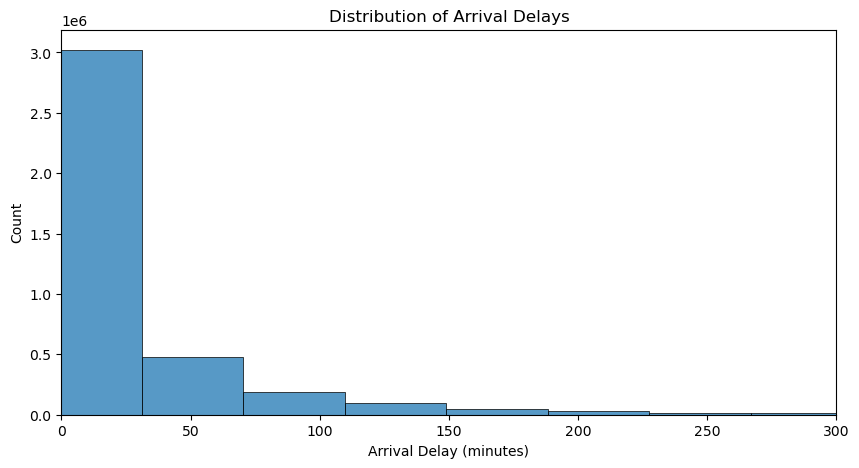

In [51]:
# 5. Delay Distribution & Tail Risk 
# When delays happen, how severe are they — and who causes the worst delays?
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df_op['ARR_DELAY'], bins=100)
plt.xlim(0, 300)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.show()


In [52]:
delay_percentiles = (df_op.groupby('OP_UNIQUE_CARRIER')['ARR_DELAY'].quantile([0.5, 0.9, 0.95]).unstack().reset_index())
delay_percentiles.columns = ['Airline', 'Median', 'P90', 'P95']
delay_percentiles.sort_values('P95', ascending=False)

,Airline,Median,P90,P95
6,Frontier Airlines,-4.0,68.0,114.00
2,American Airlines,-4.0,62.0,112.00
8,JetBlue Airways,-6.0,64.0,112.00
9,PSA Airlines,-6.0,50.0,100.00
1,Allegiant Air,-8.0,50.0,99.95
13,Spirit Airlines,-6.0,55.0,97.00
14,United Airlines,-7.0,43.0,86.00
11,SkyWest Airlines,-7.0,42.0,85.00
5,Envoy Air,-6.0,41.0,78.00
4,Endeavor Air,-11.0,34.0,76.00


In [53]:
# Cancellation Behavior vs Delay Tolerance
# Cancel vs delay tradeoff

cancel_delay_tradeoff = (df24.groupby('OP_UNIQUE_CARRIER').agg(
        cancellation_rate=('FLIGHT_STATUS', lambda x: (x == 'CANCELLED').mean()),
        avg_delay=('ARR_DELAY','mean'), extreme_delay_rate=('ARR_DELAY', lambda x: (x > 90).mean()))
    .reset_index())

cancel_delay_tradeoff


,OP_UNIQUE_CARRIER,cancellation_rate,avg_delay,extreme_delay_rate
0,Alaska Airlines,0.019571,4.467858,0.026829
1,Allegiant Air,0.017217,9.710381,0.054492
2,American Airlines,0.015495,15.307916,0.064946
3,Delta Air Lines,0.009064,3.657075,0.036202
4,Endeavor Air,0.023029,1.681912,0.039152
5,Envoy Air,0.014234,6.457716,0.039417
6,Frontier Airlines,0.023176,15.247771,0.067993
7,Hawaiian Airlines,0.010467,4.246661,0.012326
8,JetBlue Airways,0.015544,10.739642,0.065448
9,PSA Airlines,0.016454,10.026785,0.055218


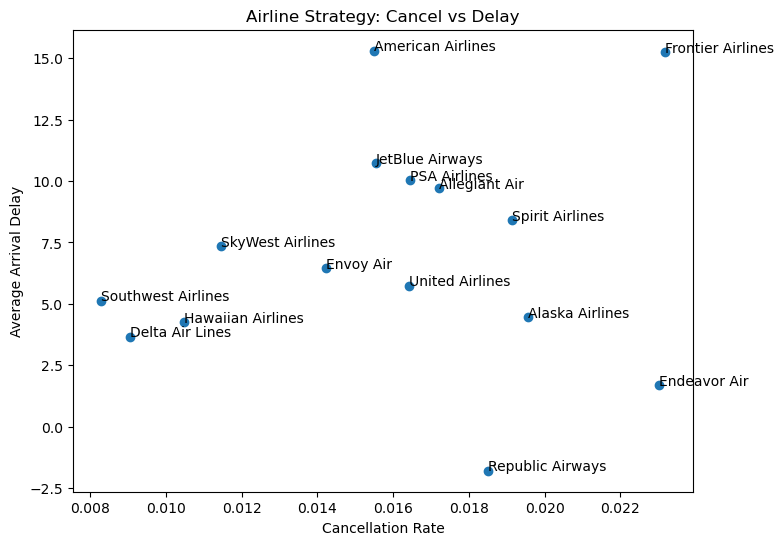

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(
    cancel_delay_tradeoff['cancellation_rate'],
    cancel_delay_tradeoff['avg_delay']
)

for _, row in cancel_delay_tradeoff.iterrows():
    plt.text(row['cancellation_rate'], row['avg_delay'], row['OP_UNIQUE_CARRIER'])

plt.xlabel('Cancellation Rate')
plt.ylabel('Average Arrival Delay')
plt.title('Airline Strategy: Cancel vs Delay')
plt.show()


In [55]:
#Ground Operations Efficiency (Hidden but Powerful)
# Are delays driven more by airspace or ground operations?
taxi_analysis = (
    df_op.groupby('ORIGIN')
    .agg(
        avg_taxi_out=('TAXI_OUT','mean'),
        avg_taxi_in=('TAXI_IN','mean'),
        delay_rate=('delayed','mean'),
        flights=('FLIGHTS','count')
    )
    .reset_index()
)
taxi_analysis = taxi_analysis[taxi_analysis['flights'] > 1000]
taxi_analysis.sort_values('avg_taxi_out', ascending=False).head(10)

,ORIGIN,avg_taxi_out,avg_taxi_in,delay_rate,flights
173,JFK,26.309042,8.765066,0.204281,120770
111,EWR,24.285247,8.390599,0.217073,125428
239,ORD,23.783844,7.428225,0.230032,275505
193,LGA,23.444515,8.962587,0.176438,158152
144,HDN,23.297504,9.209340,0.236312,2484
345,XWA,22.987093,9.081053,0.201342,1937
19,ASE,22.263583,10.436020,0.300260,7307
96,DRO,22.130090,10.214172,0.181386,3782
79,CRW,21.936780,12.195569,0.228951,3385
69,CLT,21.684646,7.318152,0.262457,214096


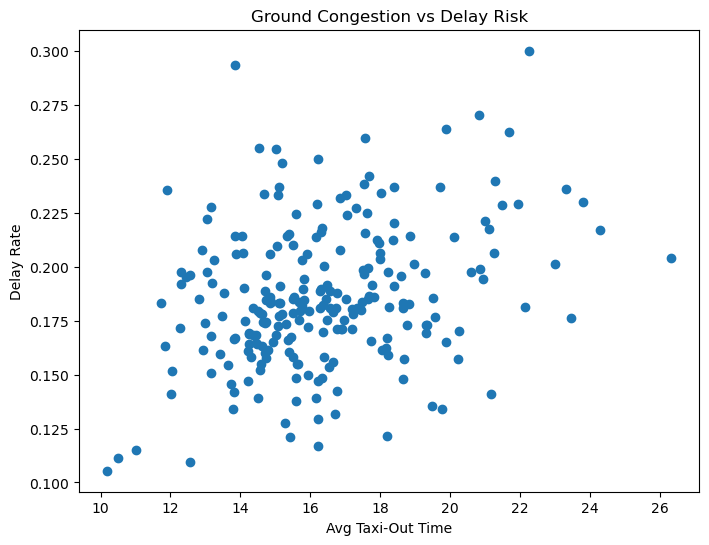

In [56]:
# Taxi vs delay relationship
plt.figure(figsize=(8,6))
plt.scatter(taxi_analysis['avg_taxi_out'], taxi_analysis['delay_rate'])
plt.xlabel('Avg Taxi-Out Time')
plt.ylabel('Delay Rate')
plt.title('Ground Congestion vs Delay Risk')
plt.show()


In [57]:
#Delay Propagation

#How much of today’s delay is caused by yesterday’s delay? (Late aircraft effect)
#Late aircraft share of delay 

df_op['total_delay'] = df_op[delay_columns].sum(axis=1)

df_op['late_aircraft_share'] = (
    df_op['LATE_AIRCRAFT_DELAY'] / df_op['total_delay']
).fillna(0)

late_aircraft_summary = (
    df_op.groupby('DEP_TIME_BLK')['late_aircraft_share']
    .mean()
    .reset_index()
)

late_aircraft_summary


C:\Users\divya\AppData\Local\Temp\ipykernel_23952\1908436915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op['total_delay'] = df_op[delay_columns].sum(axis=1)
C:\Users\divya\AppData\Local\Temp\ipykernel_23952\1908436915.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op['late_aircraft_share'] = (


,DEP_TIME_BLK,late_aircraft_share
0,0001-0559,0.012777
1,0600-0659,0.005275
2,0700-0759,0.011627
3,0800-0859,0.023988
4,0900-0959,0.039475
5,1000-1059,0.055104
6,1100-1159,0.064120
7,1200-1259,0.072716
8,1300-1359,0.083168
9,1400-1459,0.092659


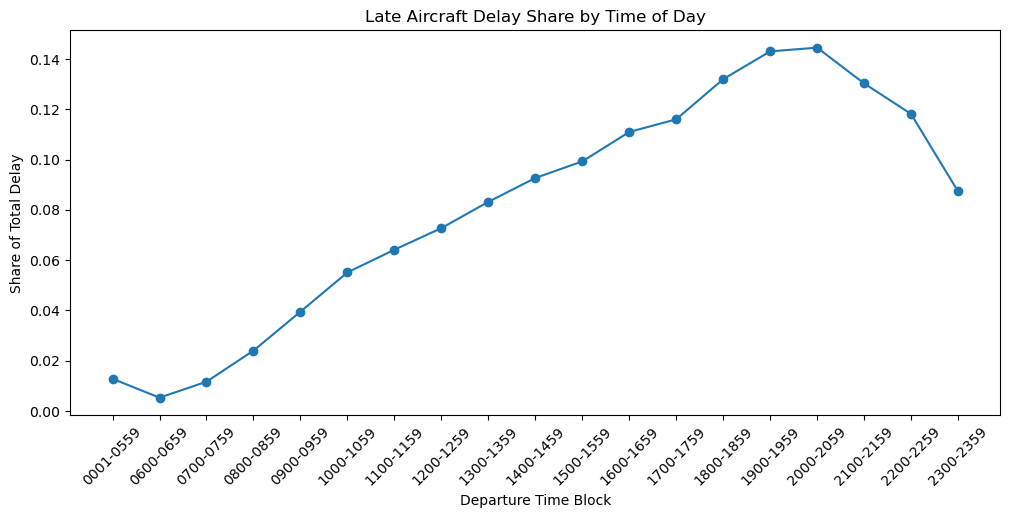

In [58]:
plt.figure(figsize=(12,5))
plt.plot(
    late_aircraft_summary['DEP_TIME_BLK'],
    late_aircraft_summary['late_aircraft_share'],
    marker='o')
plt.xticks(rotation=45)
plt.title('Late Aircraft Delay Share by Time of Day')
plt.ylabel('Share of Total Delay')
plt.xlabel('Departure Time Block')
plt.show()


In [59]:
# Q9. Route Stability
route_stability = (
    df_op.groupby(['ORIGIN','DEST'])
    .agg(
        delay_rate=('delayed','mean'),
        delay_std=('ARR_DELAY','std'),
        flights=('FLIGHTS','count')
    )
    .reset_index()
)

route_stability = route_stability[route_stability['flights'] > 500]
route_stability.sort_values('delay_std', ascending=False).head(10)


,ORIGIN,DEST,delay_rate,delay_std,flights
3071,JAC,DFW,0.309211,248.653654,608
6480,STX,MIA,0.303226,225.391095,620
5364,PWM,CLT,0.218281,194.467272,733
2279,EYW,DFW,0.453668,172.717911,518
5631,SAN,MIA,0.160584,168.204313,548
1972,DSM,CLT,0.275140,161.796519,716
6472,STT,MIA,0.231803,158.410017,893
968,BZN,DFW,0.263689,158.101322,694
6727,VPS,DFW,0.249446,157.238861,1355
6464,STT,CLT,0.285476,156.658228,599


In [60]:
# Q10. Simple Delay Risk Scoring

risk_score = (df_op.groupby(['OP_UNIQUE_CARRIER','SEASON','DEP_TIME_BLK'])['delayed'].mean().reset_index(name='delay_probability'))
risk_score.sort_values('delay_probability', ascending=False).head(10)

,OP_UNIQUE_CARRIER,SEASON,DEP_TIME_BLK,delay_probability
415,Envoy Air,Spring,2300-2359,0.750000
737,PSA Airlines,Summer,2300-2359,0.524390
203,American Airlines,Summer,1900-1959,0.513259
204,American Airlines,Summer,2000-2059,0.508293
202,American Airlines,Summer,1800-1859,0.498417
963,Southwest Airlines,Summer,2200-2259,0.495451
201,American Airlines,Summer,1700-1759,0.486120
504,Frontier Airlines,Summer,1800-1859,0.479038
503,Frontier Airlines,Summer,1700-1759,0.478232
506,Frontier Airlines,Summer,2000-2059,0.473936
